![](./img/logo.png)

# 2do Parcial: Análisis Exploratorio de Datos.

## Universidad Sergio Arboleda

Programa CCIA

Autores: Laura Gomez Amaya, Luis Ángel Rodriguez Calderon

Fecha : 10/09/2022

Topico: Resolución parcial #1 HPC

# Modelo **02**

### Descripción de Valores:

    join_date: fecha año-mes-dia hora:minuto:segundo.
    group: houston machine learning, houstonr, houston data science,
           houston energy data science, houston data visualization.
    city:  Houston, Katy, Orizaba, Spring, Cold Spring Harbor,
           Kenmore, Sugar Land, Colorado Springs, Pearland, Austin, ....
    state: TX, NY, WA, CO, MD, CA, LA, GA, MO, NC, FL, NH,
           MA, PA, KY, NE, IL, MN, TN, IN, OH, F2, NJ, NS,
           VA, MI, 18, AR, AL, OR, DE, 17, ON, SC, BC, V5,
           WI, AB, DC, AK, UT, OK, AZ, MS, CT, IA.
    country: us, mx, il, be, cn, jp, gr, in, fr, my, de,
             ye, np, no, au, gb, dz, co, tw, br, ie, pk,
             ca, hk, nl, ng, ae, sg, eg, ir, es, nz, se,
             za, cz, th, ch, by, pe, fi, kr, si, ph.
         
    

## 0.- Bibliotecas y Lectura

In [ ]:
#se importan las bibliotecas necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from collections import OrderedDict
import datetime

In [ ]:
# se carga el dataset en un objeto pandas "dataframe =df"
url = 'https://raw.githubusercontent.com/LuisAngel021/Parciales_HPC2022/main/meetup_groups.csv'
List = df_groups = pd.read_csv(url)
List = df_groups.head()


## 1.- Identificación de datos perdidos (NaN)
    - Bonus --> ¿Cuantas Filas se han eliminado después de la limpieza?

In [ ]:
#Total de registros con NaN
print("Total de registros: ")
len(df_groups)

Total de registros: 


7671

In [ ]:
#1. Limpieza de valores NAN
#1.1 Lista de cantidad de valores NaN
print("Lista de columnas con NaN")
df_groups.isnull().sum()


Lista de columnas con NaN


join_date      0
group          0
city           0
state        144
country        0
dtype: int64

**Analisis:**
Se observa que solo en la columna de stado (state) hay 144 valores NaN

In [ ]:
#1.2 Eliminar los valores NaN del dataset
List = df_groups.dropna()
df_groups.dropna()

,join_date,group,city,state,country
0,2016-11-18 02:41:29,houston machine learning,Houston,TX,us
1,2017-05-09 14:16:37,houston machine learning,Houston,TX,us
2,2016-12-30 02:34:16,houston machine learning,Houston,TX,us
3,2016-07-18 00:48:17,houston machine learning,Houston,TX,us
4,2017-05-25 12:58:16,houston machine learning,Houston,TX,us
...,...,...,...,...,...
7666,2017-10-07 18:05:24,houston data visualization,Houston,TX,us
7667,2017-06-24 14:06:26,houston data visualization,Houston,TX,us
7668,2015-10-05 17:08:40,houston data visualization,Houston,TX,us
7669,2016-11-04 22:36:24,houston data visualization,Houston,TX,us


In [ ]:
#1.3 Eliminar los valores NaN del dataset
print("Data set con los registros NaN eliminados: ")
len(List)

Data set con los registros NaN eliminados: 


7527

**Observaciones:** Como se puede apreciar, previamente eran 7671 registros contando los valores NaN, al almacenar el registro en una variable auxiliar llamada 'lista' podemos eliminar los registros en esa lista (144) y obtener un dataset limpio de valores NaN. Se han eliminado 144 registros de los 1671 registrados al inicio.


## 2.- ¿Cuantas reuniones por grupo se registraron en el DataFrame?
    - Haga un gráfico (Pastel) de reuniones por grupo en el DataFrame

<img src="./img/grupos-meetings.png" style="width:250px">

In [ ]:
#2 ¿Cuántas reuniones por grupo se registran en el dataset?
CountCategory = List['group'].value_counts(sort=False)
print(CountCategory)

houston machine learning         740
houstonr                        1037
houston data science            2150
houston energy data science     1891
houston data visualization      1709
Name: group, dtype: int64


**Observación:** Se logra apreciar que hay 5 reuniones de grupos:

* En "houston data science" hubieron 2150 reuniones
* En "houston energy data science" hubieron 1891 reuniones

* En "houston data visualization" hubieron 1709 reuniones
* En "houstonr" 1037 reuniones
* En "houston machine learning" 740 reuniones

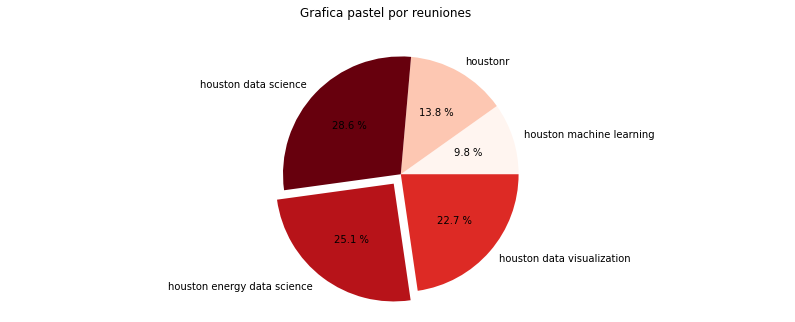

In [ ]:
#3. Hacer un gráfico (Pastel) de reuniones por grupo en el dataset
plt.figure(figsize=(14,5))
plt.suptitle('Grafica pastel por reuniones')

groups_count = CountCategory.tolist()
nombres = list(OrderedDict.fromkeys(List['group']))

normdata = colors.Normalize(min(groups_count), max(groups_count))
colormap = cm.get_cmap("Reds")
colores =colormap(normdata(groups_count))
desfase = (0, 0, 0, 0.1, 0)

plt.pie(groups_count, labels=nombres, autopct="%0.1f %%", colors=colores, explode=desfase)
plt.axis("equal")
plt.show()

**4. Analisis grafico:**

*   Se concluye que el mayor porcentaje de grupos de reuniones es Houston data Science
*   Se puede apreciar que existe un total de 7527 personas pertenecientes a un grupo de investigación de los 5 existentes.
*   Las personas muestran menos interes en el grupo Houston Machine Learning, debido a que es el de menor porcentaje de los grupos.
*   EL gráfico generado a partir de los datos, difiere del primer gráfico presentado a manera de ejemplo, siendo erroneo el gráfico de referencia ya que sus valores no coinciden con lo mostrado
*   Se puede apreciar que las personas tienen un interes alto por los grupos de houston energy data science y houston data vizualization, ya que en houston r y machine learning, no se registran una cantidad considerable de reuniones.


In [ ]:
#5. ¿Cuántas reuniones presenta el grupo ‘houston machine learning’ en el dataset
print("Numero total de reuniones del grupo Houston Machine Learning")
ML = List[List['group']=='houston machine learning']
len(ML)

Numero total de reuniones del grupo Houston Machine Learning


740

**Observación:**


*   Se puede observar que el grupo de houston machine learning ha tenido un total de 740 reuniones.


## 3.-  ¿Cuál es la proporción de reuniones en la ciudad Houston?

In [ ]:
#6. ¿Cuál es la proporción de reuniones en la ciudad de Houston?
print("Numero de reuniones en Houston")
City = List[List['city']=='Houston']
print(len(City))

Numero de reuniones en Houston
5560


In [ ]:
print("Numero de reuniones en total")
print(len(List['city']))

Numero de reuniones en total
7527


In [ ]:
print("Porcentaje de reuniones llevadas en la ciudad de Houston")
Proporcion = len(City)/len(List['city'])*100
print(Proporcion)

Porcentaje de reuniones llevadas en la ciudad de Houston
73.86741065497542


**Observación:**


* Se toma cual es la porcion principal de reuniones en Houston en la columna ciudad, que es de 5560, después se divide por el total de reuniones que son 7527, una vez hecho esto, el resultado de la división se multiplica por 100 y tendremos el porcentaje, que equivale al 74%. De esto podemos concluir que el 74% de las reuniones se hicieron en la ciudad de Houston.

## 4.- Cuáles son las 10 ciudades más usadas en USA para reuniones de los grupos:
    - 'houston machine learning ' y 'houstonr'

In [ ]:
#7. ¿Cuáles son las ciudades más usadas en USA para reuniones de los grupos?'houston machine learning ‘ y 'houstonr'
print("Ciudad mas usada para reuniones del grupo HoustonR")
HML = List[List['country'] == 'us']
ct = HML[HML['group'] == 'houstonr']
Ciudad_mas_usada_HR = ct['city'].value_counts()
pd.set_option('display.max_rows',10)

print(Ciudad_mas_usada_HR)

Ciudad mas usada para reuniones del grupo HoustonR
Houston             776
Spring               20
Katy                 20
Sugar Land           16
Austin               15
                   ... 
McKinney              1
Huntington Beach      1
Lewisville            1
Boulder               1
Long Beach            1
Name: city, Length: 106, dtype: int64


In [ ]:
#Ciudad mas usada en USA para houston machine learning
print("Ciudad mas usada para reuniones del grupo Houston Machine Learning")
MCHL = List[List['country'] == 'us']
ct1 = MCHL[MCHL['group'] == 'houston machine learning']
Ciudad_mas_usada_MCHL = ct1['city'].value_counts()
pd.set_option('display.max_rows',10)
print(Ciudad_mas_usada_MCHL)

Ciudad mas usada para reuniones del grupo Houston Machine Learning
Houston          572
Katy              29
Spring            22
Sugar Land        16
Cypress           11
                ... 
San Antonio        1
Bellevue           1
Durham             1
Athens             1
South Houston      1
Name: city, Length: 59, dtype: int64


**Observaciones:**


*   La ciudad más usada para las reuniones del grupo Houstonr en USA fue la ciudad de Houston con 776 reuniones registradas
*   La ciudad más usada para las reuniones del grupo Houston Machine Learning en USA fue la ciudad de Houston con 572 reuniones registradas



## 5.- Cuáles son las ciudades más usadas para reuniones fuera del USA por:
    -  'houston machine learning' y 'houstonr'

In [ ]:
#8. ¿Cuáles son las ciudades más usadas afuera de USA para reuniones de los grupos?'houston machine learning ‘ y 'houstonr'
print("Ciudad mas usada para reuniones del grupo HoustonR")
HML = List[List['country'] != 'us']
ct = HML[HML['group'] == 'houstonr']
Ciudad_mas_usada_HR = ct['city'].value_counts()
pd.set_option('display.max_rows',10)
print(Ciudad_mas_usada_HR)

Ciudad mas usada para reuniones del grupo HoustonR
London         2
Winchester     1
Manchester     1
Mississauga    1
Name: city, dtype: int64


In [ ]:
#Ciudad mas usada fuera de USA para houston machine learning
print("Ciudad mas usada para reuniones del grupo Houston Machine Learning")
MCHL = List[List['country'] != 'us']
ct1 = MCHL[MCHL['group'] == 'houston machine learning']
Ciudad_mas_usada_MCHL = ct1['city'].value_counts()
pd.set_option('display.max_rows',10)
print(Ciudad_mas_usada_MCHL)

Ciudad mas usada para reuniones del grupo Houston Machine Learning
Series([], Name: city, dtype: int64)


**Observaciones:**


*   La ciudad en la cual se reunio más el grupo de HoustonR fuera de USA fue en London con 2 reuniones registradas
*   No se registraron ciudades fuera de USA para el grupo de Houston Machine Learning

## 6.- El  grupo 'houston data visualization' cuando hace reuniones en USA:
    - ¿Es cierto que la segunda ciudad en donde hacen más reuniones es Austin?

In [ ]:
#9. El grupo 'houston data visualization' cuando hace reuniones en USA:
print("Listado de fechas en las que el grupo Houston data visualization se reunion en USA")
Fecha = List[List['group'] == 'houston data visualization ']
Reunion = Fecha[Fecha['country'] == 'us']
Aux = Reunion['join_date'].value_counts()
print(Aux)

Listado de fechas en las que el grupo Houston data visualization se reunion en USA
2013-10-27 19:51:46    5
2013-10-27 19:51:47    2
2016-07-28 03:12:34    1
2015-11-30 05:27:14    1
2016-12-10 03:37:14    1
                      ..
2014-10-02 14:58:45    1
2015-05-11 15:37:44    1
2014-07-01 19:02:37    1
2016-05-12 20:03:44    1
2016-08-02 17:47:29    1
Name: join_date, Length: 1698, dtype: int64


In [ ]:
#- ¿Es cierto que la segunda ciudad en dónde hacen más reuniones es Austin?
HDV = List[List['country'] == 'us']
ct2 = HDV[HDV['group'] == 'houston data visualization ']
Ciudad_mas_usada_HDV = ct2['city'].value_counts()
pd.set_option('display.max_rows',12)
print(Ciudad_mas_usada_HDV)

Houston         1264
Spring            53
Sugar Land        36
Katy              35
Austin            27
                ... 
Philadelphia       1
Odessa             1
Cleveland          1
Evergreen          1
El Paso            1
Name: city, Length: 116, dtype: int64


**Observaciones:**



*   Se puede observar que se muestra las fechas cuando el grupo de Houston data visualization se reunieron en US
*   Es falso, ya que la segunda ciudad en la que más se reunieron fue en Spring, Austin fue la quinta ciudad en donde más se reunieron.


## 7.- ¿Cuál fue el mes que más reuniones tuvo el grupo 'houstonr' en el año 2016?

        - Agregar columna 'month' y 'year'

<img src="./img/graf02.png">

In [ ]:
#10. Agregar columna ‘month’ y ‘year’
List['month'] = List['join_date'].apply(lambda row: (row[5:7]))
List['year'] = List['join_date'].apply(lambda row: (row[0:4]))
List

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,join_date,group,city,state,country,month,year
0,2016-11-18 02:41:29,houston machine learning,Houston,TX,us,11,2016
1,2017-05-09 14:16:37,houston machine learning,Houston,TX,us,05,2017
2,2016-12-30 02:34:16,houston machine learning,Houston,TX,us,12,2016
3,2016-07-18 00:48:17,houston machine learning,Houston,TX,us,07,2016
4,2017-05-25 12:58:16,houston machine learning,Houston,TX,us,05,2017
...,...,...,...,...,...,...,...
7666,2017-10-07 18:05:24,houston data visualization,Houston,TX,us,10,2017
7667,2017-06-24 14:06:26,houston data visualization,Houston,TX,us,06,2017
7668,2015-10-05 17:08:40,houston data visualization,Houston,TX,us,10,2015
7669,2016-11-04 22:36:24,houston data visualization,Houston,TX,us,11,2016


In [ ]:
#11. ¿Cuál fue el mes que más reuniones tuvo el grupo 'houstonr' en el año 2016?
print("Mes  Numero de reuniones")
grupo = List[List['group'] == 'houstonr']
mes = grupo[grupo['year'] == '2016']
L = mes['month']
reuniones = mes['month'].value_counts()
pd.set_option('display.max_rows',12)
print(reuniones)


Mes  Numero de reuniones
10    84
02    43
11    32
01    30
03    29
06    29
09    28
08    28
05    21
04    21
12    17
07    15
Name: month, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Grafico de las reuniones por mes del grupo HoustonR')

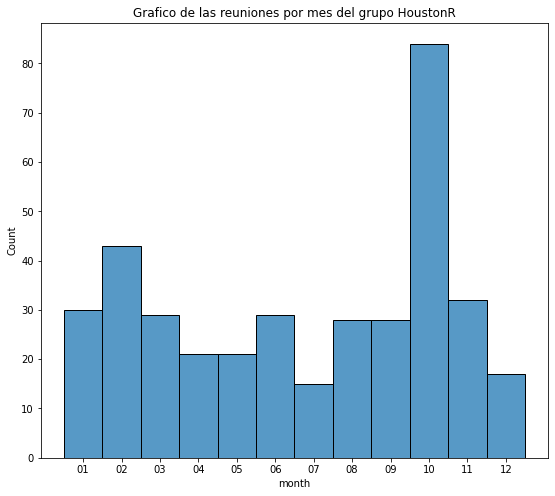

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.histplot(L.sort_values(0,True))
plt.title('Grafico de las reuniones por mes del grupo HoustonR')

**Observaciones:**



*  Como se puede apreciar en los resultados generados, en el mes de octubre del año 2016 fue el año con más reuniones para el grupo HoustonR, contando con 84 reuniones.


## 8.- ¿Cuantas reuniones por año se registraron en el DataFrame?

In [ ]:
#12. ¿Cuántas reuniones por año se registraron en el DataFrame?
print("Total de reuniones desde el año 2010 al 2017")
year = List['year']
año = List['year'].value_counts()
print(año)

Total de reuniones desde el año 2010 al 2017
2017    3019
2016    2679
2015    1310
2014     349
2013      78
2012      44
2011      29
2010      19
Name: year, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Grafico de las reuniones llevadas acabo desde el 2010 hasta el 2017')

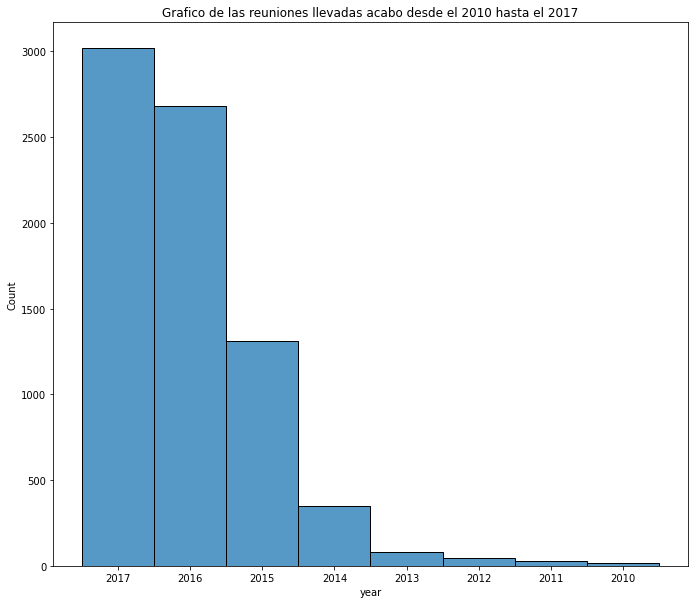

In [ ]:

plt.figure(figsize=(25,10))
plt.subplot(121)
sns.histplot(year.sort_values(0,False))
plt.title('Grafico de las reuniones llevadas acabo desde el 2010 hasta el 2017')

**Observaciones:**



*   Hay un total de 7527 registros, de los cuales se puede apreciar que al paso de los años, desde 2010 al 2017 se han llevado acabo distintas reuniones en total, siendo el 2017 el año donde se han registrado más reuniones de los grupos en general, y en 2010 donde se han llevado acabo menos reuniones.


## 9.- ¿Cuantas veces por año se han reunido los grupos ('houston data science', 'houston machine learning') fuera de USA en el dataframe?

In [ ]:
#13.  ¿Cuántas veces por año se han reunido los grupos ('houston data science') fuera de USA en el dataframe?
print("Numero de veces que se han reunido el grupo Houston Data Science a traves de los años, fuera de USA")
HDS = List[List['country'] != 'us']
Grupo = HDS[HDS['group'] == 'houston data science']
año_reunidos = Grupo['year'].value_counts()
pd.set_option('display.max_rows',5)
print(año_reunidos)

Numero de veces que se han reunido el grupo Houston Data Science a traves de los años, fuera de USA
2017    3
2016    1
Name: year, dtype: int64


In [ ]:
# ¿Cuántas veces por año se han reunido los grupos ('houston machine learning') fuera de USA en el dataframe?
print("Numero de veces que se han reunido el grupo Houston Machine Learning a traves de los años, fuera de USA")
HML = List[List['country'] != 'us']
Grupo = HML[HML['group'] == 'houston machine learning']
año_reunidos2 = Grupo['year'].value_counts()
pd.set_option('display.max_rows',5)
print(año_reunidos2)

Numero de veces que se han reunido el grupo Houston Machine Learning a traves de los años, fuera de USA
Series([], Name: year, dtype: int64)


**Observaciones:**


*   Se aprecia que para el grupo Houston data science solo se han reunido 4 veces fuera de USA, se toma registro de una reunion en 2016 fuera de USA y de 3 reuniones en 2017. Solo se realizaron 4 reuniones de este grupo fuera de USA
*   Como previamente se habia señalado, el grupo de Houston Machine Learning no tuvo reuniones por fuera de USA, por eso no hay registros de alguna reunion realizada en un determinado año fuera de USA

## 10.- ¿Cuales son los países en los que se hace reunión los grupos?

In [ ]:
Paises = List['country'].value_counts()
print(Paises)

us    7500
ca      15
gb      12
Name: country, dtype: int64


## **Conclusiones:**

* Se concluye que al menos en 144 reuniones, no se documento en que estado del país se encontraban, por ende estos registros son nulos y no aportan información sustancial al analisís, por esta razón no se incluyen en el análisis.

* Se evidencia que el grupo que genera más interes en las personas, es Houston data sciences, ya que el mayor porcentaje y numero de reuniones en general que se tiene registros, es de este.

* Se evidencia que en laa ciudad de Houston en US, se han llevado acabo la mayoria de reuniones, llegando a haber más de 5560 de las 7527 reuniones en total, sin contar aquellas reuniones donde no se ha registrado el estado donde se realizaron las reuniones.

* En USA se evidencia que para el grupo Houston machine learning las principales ciudades donde más se llevaron registro de sus reuniones fueron: Houston con 572 registros; Katy con 29 registros; Spring con 22 registros; Sugar Land con 16 registros y Cypress con 11 reuniones registradas.

* En USA se evidencia que para el grupo HoustonR las principales ciudades donde más se llevaron registro de sus reuniones fueron: Houston con 776 registros; Spring y Katy con 20 reuniones registradas; Sugar Land con 16 registros y Austin con 15 reuniones registradas.

* Se aprecia que para el grupo HoustonR se llevaron acabo 5 reuniones por fuera de USA, las cuales fueron el London con 2 registros, Winchester, Manchester y Mississaugi con 1 reunion registrada.

* Fuera de USA, se evidencia que el grupo de Houston Machine Learning no tuvo ninguna reunion registrada.

* Se concluye que en USA el grupo Houston data visualization se llevan acabo reuniones bastante seguido, donde hay registro de 1698 fechas registradas donde se han reunido en USA.

* Después del analisís requerido, se concluye que la segunda ciudad donde el grupo Houston data visualization es Spring, con 53 reuniones registradas. Austin es la quinta ciudad donde más se han reunido, con 27 registros de reuniones en la ciudad.

* Para el año 2016 se puede concluir que, el grupo HoustonR tuvo un gran número de reuniones en el mes de octubre, con un total de 84 reuniones registradas, como se puede apreciar y abstraer de la gráfica de numero de reuniones vs mes.

* Existe un total de 7527 registros, de los cuales se puede apreciar que al paso de los años, desde 2010 al 2017 se han llevado acabo distintas reuniones en total, siendo el 2017 el año donde se han registrado más reuniones de los grupos en general con un total de 3019 reuniones, como se puede apreciar en la gráfica. Por otro lado, en el año 2010 se registraron un total de 19 reuniones, concluyendo que en este año, la población no estuvo tan interesada en los grupos.

* Se puede apreciar que para el grupo Houston data science se llevaron acabo 4 reuniones por fuera de USA, en 2017 se registraron 3 reuniones y en 2016 solo se registro una reunion. Por lo tanto se puede concluir que la mayoria de reuniones para este grupo se llevaron acabo en USA.

* Previamente se hizo mención que para el grupo de Houston machine learning, no se registran reuniones por fuera de USA, por tal motivo, no se realizo ninguna reunion de este grupo por fuera de USA.

* El país donde más se reunen los grupos es Estados Unidos con 7500 reuniones registradas.

* El segundo país donde se encuentra una mayor cantidad de reuniones registradas, pero menor a Estados Unidos es Canada con 15 registros de reuniones.

* El tercer país donde se registraron reuniones fue en Reino Unido, con 12 registros de reunion, inferior a Estados Unidos y Canada.

* Los datos almacenados en el dataframe, no son de tipo numericos, por ende se concluye que para realizar un promedio, varianza, desviación estandar o alguna otra estadistica al dataset, no es posible mediante métodos matemáticos, se recurre al analisís para la conversión de datos a información.

## **Referencias**

* Eliminar NaN en phyton con numpy: https://www.delftstack.com/es/howto/python/remove-nan-from-list-python/#:~:text=%2C%206%2C%204%5D-,Elimine%20NaN%20de%20la%20lista%20en%20Python%20usando%20el%20m%C3%A9todo,devuelve%20False%20en%20caso%20contrario.


* ¿Comó leer un dataset desde un repositorio? https://www.youtube.com/watch?v=uB9WcIpsdUc&ab_channel=DiMathData

* ¿Comó hacer grafico de barras?: https://cursosinformatica.ucm.es/trial/dataviz/

* ¿Comó hacer grafico pastel?: https://numython.github.io/posts/graficas-de-pastel-con-matplotlib/

* Dividir texto en columnas con pandas: https://www.analyticslane.com/2020/10/19/separar-texto-en-columnas-con-pandas-en-python/

* Convertir String a fecha en python: https://j2logo.com/convertir-un-string-en-fecha-en-python/

* Agrupar fechas en un dataframe: https://www.youtube.com/watch?v=S0wBCpuGToM&ab_channel=cctmexico

* Función filter en python: https://www.codigopiton.com/como-filtrar-una-lista-en-python/




## Link del repositorio: https://github.com/LuisAngel021/Parciales_HPC2022

* En el repositorio se aloja el dataset con extensión '.csv'. Gracias a esto, no es necesario cargar el dataset cada vez que se vaya a ejecutar cualquier linea de codigo.